In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(Path("data_ratios.csv"))

In [4]:
data.rename(columns={'Unnamed: 0':'delete'}, inplace=True)
data.drop(columns={"delete"},inplace=True)

In [5]:
data.shape

(78401, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78401 entries, 0 to 78400
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   current_assets                      78401 non-null  float64
 1   cost_of_goods_sold                  78401 non-null  float64
 2   depreciation_and_amortization       78401 non-null  float64
 3   EBITDA                              78401 non-null  float64
 4   inventory                           78401 non-null  float64
 5   net_income                          78401 non-null  float64
 6   total_receivables                   78401 non-null  float64
 7   market_value                        78401 non-null  float64
 8   net_sales                           78401 non-null  float64
 9   total_assets                        78401 non-null  float64
 10  total_long_term_debt                78401 non-null  float64
 11  EBIT                                78401

In [7]:
data.head()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,...,1.382369,344.263,0.464594,0.243519,339.515,1.013985,2.182519,-1.004154,0.047454,0.103568
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,...,1.245637,305.379,0.435103,0.256445,340.212,0.897614,2.062990,-0.925326,0.026403,0.054469
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,...,0.899355,368.163,0.518394,0.306532,310.235,1.186723,2.289229,-0.703000,-0.082989,-0.189982
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,...,0.883074,368.233,0.536297,0.239809,294.988,1.248298,2.327623,-0.678689,-0.018074,-0.042070
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,...,0.919167,379.927,0.535643,0.350583,301.684,1.259354,2.351109,-0.670825,0.004940,0.011615


In [8]:
# Import module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create X, or features DataFrame
X = data[['current_ratio', 'total_debt_to_equity_ratio']]

# Create y, or target DataFrame
y = data['status']

# Use train_test_split to separate the data
#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [9]:
# importing module
from sklearn.ensemble import AdaBoostRegressor

# Create adaboost regressor with default parameters
Ada_regressor = AdaBoostRegressor()

# Train Adaboost Classifer
AdaBoost_R = Ada_regressor.fit(X_train, y_train)

In [10]:
# Grade the prediction
AdaBoostR_pred = AdaBoost_R.predict(X_test)

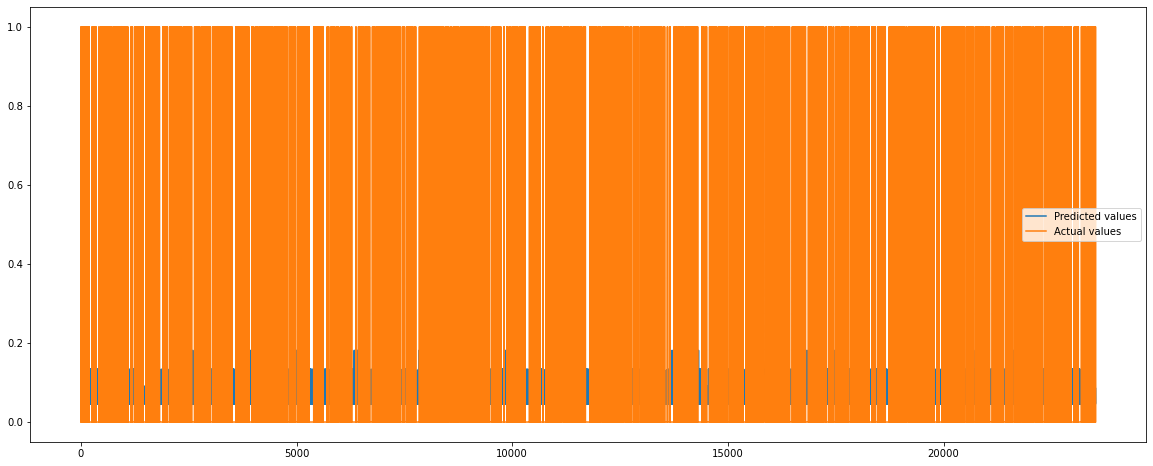

In [11]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],AdaBoostR_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="Actual values")
plt.legend()
plt.show()

In [12]:
# Importing r2 
from sklearn.metrics import r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_test, AdaBoostR_pred))

R-square score is : 0.012583745710836425


In [13]:
# importing required module
from sklearn.model_selection import GridSearchCV

# initializing the model
model=AdaBoostRegressor()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})

# training the model
grid.fit(X_train,y_train)

# printing the best estimator
print("The best estimator returned by GridSearch CV is:", grid.best_estimator_)

The best estimator returned by GridSearch CV is: AdaBoostRegressor(n_estimators=24)


## Train model with optimum number of stump trees

In [19]:
# Create adaboost regressor with default parameters
Ada_regressor26 = AdaBoostRegressor(n_estimators=24)

# Train Adaboost Classifer
AdaBoost_R26 = Ada_regressor26.fit(X_train, y_train)

#Predict 
AdaBoostR_pred26 = AdaBoost_R26.predict(X_test)

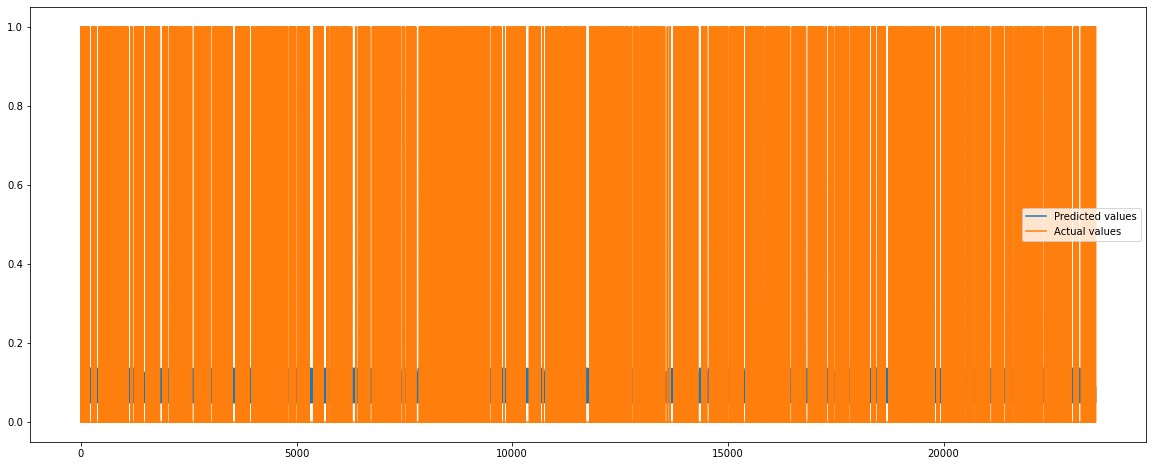

In [20]:
# Visualize the tested model
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],AdaBoostR_pred26, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="Actual values")
plt.legend()
plt.show()

In [21]:
# Importing r2 
from sklearn.metrics import r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_test, AdaBoostR_pred26))

R-square score is : 0.00998041182262166


# Interpretation
If the squared error is very small then we can say that the line is a good fit. So if SEline is a small number then the whole fraction will be a very small value. And this will result in a larger number when subtracted from one. Thus if the squared error is small then R squared or the coefficient of determination will get larger, nearly equal to one. This shows that the line is a good fit.
Similarly in the opposite case if the squared error of line is huge that means a lot of error between data points and the line, then SEline this number will get large and hence resulting in a larger value of the fraction. So the R squared or the coefficient of determination will be a smaller value, showing a poorly fit regression line.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=24)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

In [23]:
# Import the module
from sklearn.metrics import classification_report
# Save a classification report
training_report = classification_report(y_train, AdaBoostR_pred26)
# Then view its output
print(training_report)

ValueError: Found input variables with inconsistent numbers of samples: [54880, 23521]

In [25]:
# Import the module
from imblearn.metrics import classification_report_imbalanced

# Print the classification report
classification_report = classification_report_imbalanced(y_test,AdaBoostR_pred26)
print(classification_report)

ValueError: Mix type of y not allowed, got types {'binary', 'continuous'}